In [180]:
# import packages 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the packages needed for this part
# create spark and sparkcontext objects
import numpy as np



In [182]:
import os

os.getcwd()

'C:\\Users\\Sumeet Santani'

In [183]:
dataset = pd.read_csv('HW8_dataset.csv')

In [184]:
dataset.head()

,Unnamed: 0,abc,abrupt,absolut,accept,accord,acknowledg,across,actual,add,...,wrote,xyz,yeah,yelp,yesterday,york,your,yuenan,lie,sentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
#for sentiments
X = dataset.iloc[:, [0, 987]].values
y = dataset.iloc[:, 988].values

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

rng = np.random.RandomState(42)
noise = rng.normal(size = (len(dataset), 50))
x_w_noise = np.hstack([dataset, noise])

In [187]:

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_w_noise, y, test_size = 0.25, random_state = 0)




In [188]:
select = SelectPercentile(percentile = 50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)


X_train
X_train_selected.shape

C:\Users\Sumeet Santani\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [  1   2   4  11  17  21  31  42  58  61  63  66  67  69  72  73  74  76
  78  92  99 112 114 119 120 140 142 143 149 155 158 163 167 178 181 203
 206 218 220 221 223 227 246 248 249 250 254 265 269 271 272 281 283 297
 302 307 311 318 319 322 327 330 335 345 347 356 380 387 390 391 399 403
 409 413 416 420 425 430 438 454 466 474 478 481 491 492 494 503 506 508
 513 545 549 559 562 564 573 575 580 585 589 591 595 598 599 604 605 606
 613 616 618 620 626 627 630 634 642 644 645 648 653 668 678 684 685 693
 699 706 708 719 724 726 729 733 736 737 738 743 764 767 769 776 783 785
 795 797 799 810 819 836 838 841 849 854 865 866 874 877 881 887 896 902
 906 908 909 918 919 924 942 947 951 954 961 969 979 988] are constant.
  UserWarning)
C:\Users\Sumeet Santani\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divi

(69, 520)

In [189]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [190]:

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None)

In [191]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [192]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0],
       [ 6,  5]], dtype=int64)

In [193]:
Overall_accuracy = sum(np.diag(cm))/np.sum(cm)
Overall_accuracy

0.7391304347826086

In [194]:
#Precision is the number of true positives over the number of true positives plus the number of false positives = tp/tp+fp
Precision = 12/(12+0) 
Precision

1.0

In [195]:
#Recall is the number of true positives over the number of true positives plus the number of false negatives = tp/tp+fn
Recall = 12/(12+6)
Recall

0.6666666666666666

[ True False False ...  True False False]


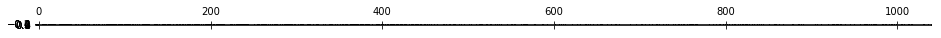

In [196]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap= "gray_r")

In [197]:
mask

array([ True, False, False, ...,  True, False, False])

In [198]:
new_features = [] # The list of your K best features

for bool, feature in zip(mask, X_train_selected):
    if bool:
        new_features.append(feature)

In [199]:
dataframe = pd.DataFrame(X_train_selected, columns=new_features)


In [201]:

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [202]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0],
       [ 0, 11]], dtype=int64)

In [203]:
accuracy = sum(np.diag(cm))/np.sum(cm)
accuracy

1.0

In [204]:
#Precision is the number of true positives over the number of true positives plus the number of false positives = tp/tp+fp
Precision = 12/(12+0) 
Precision

1.0

In [205]:
#Recall is the number of true positives over the number of true positives plus the number of false negatives = tp/tp+fn
Recall = 12/(12+0)
Recall

1.0

In [206]:
#Prediction model for sentiment
dataset.head()

,Unnamed: 0,abc,abrupt,absolut,accept,accord,acknowledg,across,actual,add,...,wrote,xyz,yeah,yelp,yesterday,york,your,yuenan,lie,sentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:

#for sentiments
X = dataset.iloc[:, [0, 988]].values
y = dataset.iloc[:, 989].values

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

rng = np.random.RandomState(42)
noise = rng.normal(size = (len(dataset), 50))
x_w_noise = np.hstack([dataset, noise])

In [209]:

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_w_noise, y, test_size = 0.25, random_state = 0)



In [210]:
select = SelectPercentile(percentile = 50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)


X_train
X_train_selected.shape

C:\Users\Sumeet Santani\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [  1   2   4  11  17  21  31  42  58  61  63  66  67  69  72  73  74  76
  78  92  99 112 114 119 120 140 142 143 149 155 158 163 167 178 181 203
 206 218 220 221 223 227 246 248 249 250 254 265 269 271 272 281 283 297
 302 307 311 318 319 322 327 330 335 345 347 356 380 387 390 391 399 403
 409 413 416 420 425 430 438 454 466 474 478 481 491 492 494 503 506 508
 513 545 549 559 562 564 573 575 580 585 589 591 595 598 599 604 605 606
 613 616 618 620 626 627 630 634 642 644 645 648 653 668 678 684 685 693
 699 706 708 719 724 726 729 733 736 737 738 743 764 767 769 776 783 785
 795 797 799 810 819 836 838 841 849 854 865 866 874 877 881 887 896 902
 906 908 909 918 919 924 942 947 951 954 961 969 979 989] are constant.
  UserWarning)
C:\Users\Sumeet Santani\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divi

(69, 520)

In [211]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [212]:

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [213]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [214]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  4],
       [ 3,  6]], dtype=int64)

In [215]:
Overall_accuracy = sum(np.diag(cm))/np.sum(cm)
Overall_accuracy

0.6956521739130435

In [216]:
#Precision is the number of true positives over the number of true positives plus the number of false positives = tp/tp+fp
Precision = 10/(10+4) 
Precision

0.7142857142857143

In [217]:
#Recall is the number of true positives over the number of true positives plus the number of false negatives = tp/tp+fn
Recall = 10/(10+3)
Recall

0.7692307692307693

In [218]:
#Classifying sentiments using SVM

In [219]:

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [220]:
cm

array([[12,  2],
       [ 0,  9]], dtype=int64)

In [221]:
accuracy = sum(np.diag(cm))/np.sum(cm)
accuracy

0.9130434782608695

In [222]:
#Precision is the number of true positives over the number of true positives plus the number of false positives = tp/tp+fp
Precision = 12/(12+2) 
Precision

0.8571428571428571

In [223]:
#Recall is the number of true positives over the number of true positives plus the number of false negatives = tp/tp+fn
Recall = 12/(12+0)
Recall

1.0

In [224]:
#Top 20 features 
mask.tolist()

[True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True

In [229]:
list(dataset)

['Unnamed: 0',
 'abc',
 'abrupt',
 'absolut',
 'accept',
 'accord',
 'acknowledg',
 'across',
 'actual',
 'add',
 'ador',
 'aforement',
 'ago',
 'agre',
 'air',
 'albert',
 'alfredo',
 'almost',
 'along',
 'alreadi',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambient',
 'amer',
 'america',
 'american',
 'amount',
 'angri',
 'anoth',
 'answer',
 'anywher',
 'appal',
 'appeal',
 'appet',
 'applebe',
 'appli',
 'appropri',
 'area',
 'around',
 'arriv',
 'artichokeol',
 'asap',
 'asian',
 'ask',
 'assist',
 'ate',
 'atmospher',
 'attend',
 'attent',
 'attitud',
 'authent',
 'averag',
 'avoid',
 'away',
 'awesom',
 'awkward',
 'babi',
 'back',
 'background',
 'bad',
 'baffl',
 'bag',
 'bake',
 'bakeri',
 'balanc',
 'balloon',
 'banana',
 'bank',
 'bar',
 'barbqu',
 'bare',
 'bartend',
 'basic',
 'bean',
 'beauti',
 'becam',
 'beef',
 'beer',
 'began',
 'believ',
 'bento',
 'best',
 'better',
 'big',
 'biggest',
 'bill',
 'birthday',
 'bit',
 'bite',
 'black',
 'blackjack',
 'bla

In [231]:
#Unnamed
#absolut
#accord
#acknowledg
#across
#actual
#add
#ago
#agre
#air
#albert
#alfredo
#along
#alreadi
#also
#ambient
#amer
#america
#american
#amount
#angri